In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("Hunger Games survival analysis data set.csv")

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          24 non-null     int64  
 1   unique_id      24 non-null     int64  
 2   name           24 non-null     object 
 3   district       24 non-null     int64  
 4   sex            24 non-null     int64  
 5   age            24 non-null     int64  
 6   volunteer      24 non-null     int64  
 7   career         24 non-null     int64  
 8   rating         9 non-null      float64
 9   rating_ave     24 non-null     int64  
 10  rating_rand    24 non-null     int64  
 11  survival_days  24 non-null     int64  
 12  rank           24 non-null     int64  
 13  winner         24 non-null     int64  
 14  alliance       13 non-null     float64
dtypes: float64(2), int64(12), object(1)
memory usage: 2.9+ KB


In [4]:
df.shape

(24, 15)

In [5]:
df.size

360

In [6]:
df["sex"] = df["sex"].astype("str")
df["sex"] = df["sex"].str.replace("0","F")
df['sex'] = df["sex"].str.replace("1","M")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          24 non-null     int64  
 1   unique_id      24 non-null     int64  
 2   name           24 non-null     object 
 3   district       24 non-null     int64  
 4   sex            24 non-null     object 
 5   age            24 non-null     int64  
 6   volunteer      24 non-null     int64  
 7   career         24 non-null     int64  
 8   rating         9 non-null      float64
 9   rating_ave     24 non-null     int64  
 10  rating_rand    24 non-null     int64  
 11  survival_days  24 non-null     int64  
 12  rank           24 non-null     int64  
 13  winner         24 non-null     int64  
 14  alliance       13 non-null     float64
dtypes: float64(2), int64(11), object(2)
memory usage: 2.9+ KB


In [8]:
df["volunteer"] = df["volunteer"].astype(str)
df["volunteer"] = df["volunteer"].replace("0","no")
df["volunteer"] = df["volunteer"].replace("1","yes")
df["volunteer"].value_counts()

volunteer
no     16
yes     8
Name: count, dtype: int64

In [19]:
pivot_table = df.groupby(['age', 'district']).size().reset_index(name='count')

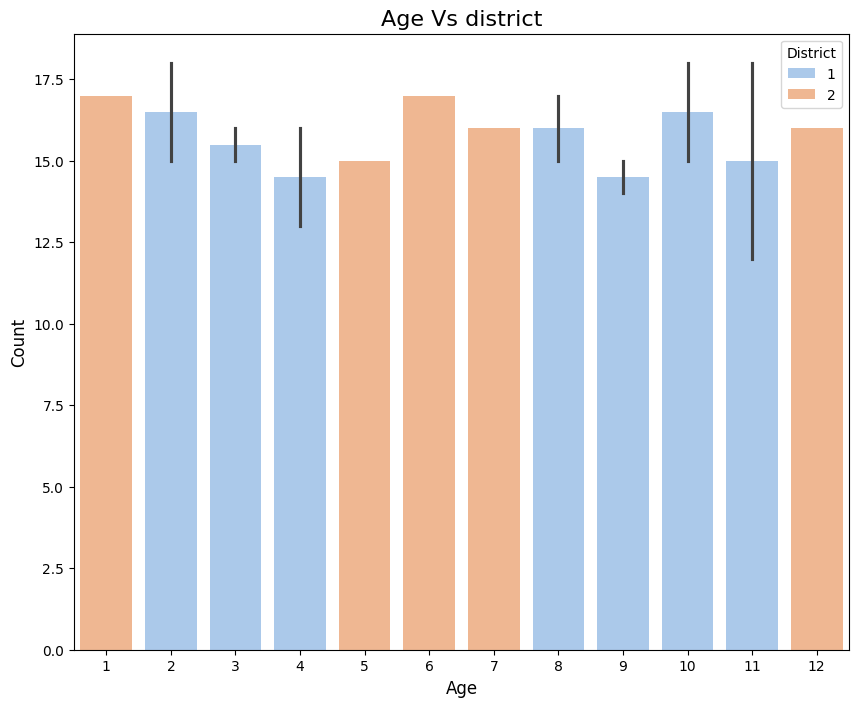

In [38]:
plt.figure(figsize=(10, 8))
sns.barplot(x='district', y='age', hue='count', data=pivot_table, palette='pastel')
plt.title('Age Vs district', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='District')
plt.show()

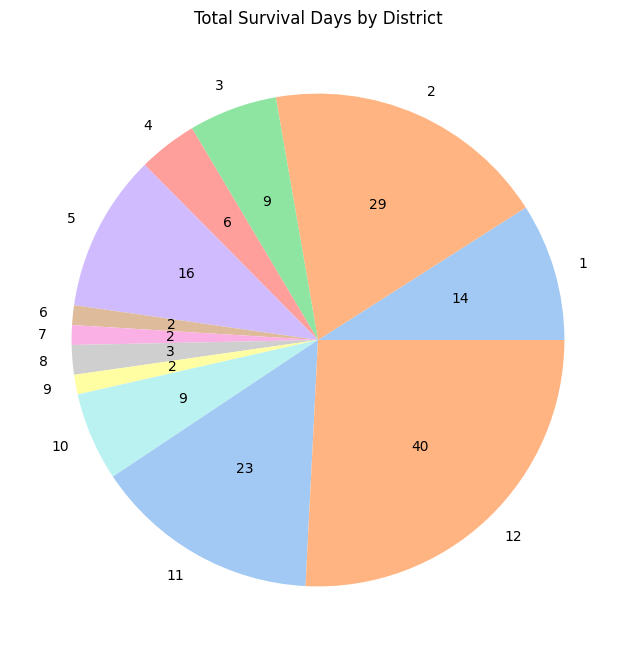

In [36]:
district_counts = df.groupby('district')['survival_days'].sum()
def absolute_value(val):
    total = district_counts.sum()
    return f'{int(round(val * total / 100))}'
colors = sns.color_palette('pastel', len(district_counts))
plt.figure(figsize=(8, 8))
plt.pie(district_counts, labels=district_counts.index, autopct=absolute_value, colors=colors)
plt.title('Total Survival Days by District')
plt.show()